FFR 120  
Felix Waldschock

HW 2  
Exercise 7.1

In [296]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])


In [297]:
# parameters
sigma = 1
dT = 1
N = int(10e4) # number of trajectories
#M = int(10e2) # number of time steps
x0 = 0


In [299]:
def updatePos(x):
    o = np.random.randn()*np.sqrt(dT)
    x += o
    return x

# 7.1
Show that they are Gaussian distributed around x0 and with standard deviation of $\sigma\sqrt{2*j*\Delta t}$

In [300]:
T_ = [1, 4, 16, 64] # at times
T_ = np.array(T_)
#T_ = [1]
N = 10000           # number of independet trajectories (particles)
t0 = 5              # time to start recording

T_ = t0 * T_

# fix the random seed
np.random.seed(42)

# create the trajectory matrix for each particle and each time-length
trajectory = np.zeros((len(T_), N))

# loop over particles
for i in range(N):
    # loop over time-lengths
    for j in range(len(T_)):
        # init particle
        x = x0

        # time-length -> multiple of t0
        t = T_[j]
        # loop over time
        for k in range(t):
            x = updatePos(x)
    
        # paste the final position of the particle in the trajectory matrix
        trajectory[j,i] = x



In [301]:
print(1%2)

1


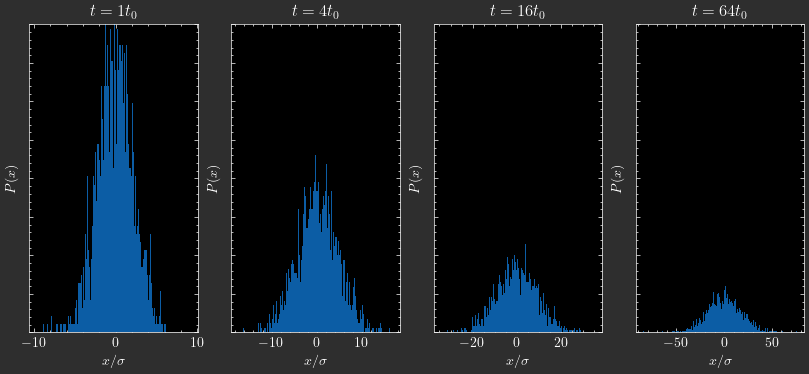

In [302]:
# plot the histogram of the final positions, subplot 

fig, ax = plt.subplots(1,4, figsize=(10,4))

for i in range(len(T_)):
    ax[ i].hist(trajectory[i,:], bins=1000, density=True)
    ax[ i].set_title(f'$t = {int(T_[i]/t0)} t_0$')
    ax[ i].set_xlabel('$x / \sigma$')
    ax[ i].set_ylabel('$P(x)$')
    # set equal y axis for all subplots
    ax[ i].set_ylim([0, 0.2])
    # hide y numbers
    ax[ i].set_yticklabels([])


The standard deviation $\sigma \sqrt{2j\Delta t}$ depends on j, which is in this case $[1, 4, 16, 64]$.  
With $x_0 = 0$ one can see that all distributions center around $x_0$.  
The standard deviations are calculated the following. It can be seen that they differ from the theoretical ones. For all four different time evaluations its about 29%. 

In [303]:
# calculate the standard deviation for each time length
std_numerical = np.std(trajectory, axis=1)
print("Numerical results for standard deviation:")
for i in range(len(std_numerical)):
    print(f'std[{i}] = {std_numerical[i]}')

# analytical results for the standard deviations
def stdAnalytical(sigma, j, dt):
    return sigma * np.sqrt(2*j*dt)

std_analytical = stdAnalytical(sigma, T_, dT)
print("Analytical results for standard deviation:")
for i in range(len(std_analytical)):
    print(f'std[{i}] = {std_analytical[i]}')

# relative differences between analytical and numerical results
relative_differences = np.abs(std_numerical - std_analytical) / std_analytical
print("Relative differences:")
for i in range(len(relative_differences)):
    print(f'relative_difference[{i}] = {relative_differences[i]}')

Numerical results for standard deviation:
std[0] = 2.2527348979685415
std[1] = 4.4996791122360476
std[2] = 8.952541607959615
std[3] = 17.704887598337066
Analytical results for standard deviation:
std[0] = 3.1622776601683795
std[1] = 6.324555320336759
std[2] = 12.649110640673518
std[3] = 25.298221281347036
Relative differences:
relative_difference[0] = 0.2876226757872388
relative_difference[1] = 0.2885382632724831
relative_difference[2] = 0.29223944178553524
relative_difference[3] = 0.30015286839983135
